Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Loading Dataset
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


##  EDA

In [3]:
data = data.rename({'Unnamed: 0':'city'}, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

city        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
data.duplicated().sum()

0

## Hierarchical clustering

In [6]:
# Normalizing Dataset
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(data.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


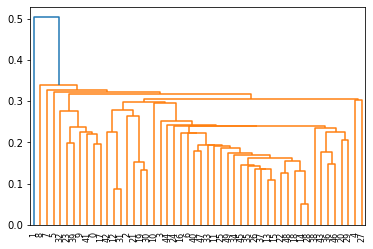

In [7]:
dendograms=sch.dendrogram(sch.linkage(df_norm,'single'))

In [8]:
# create clusters
k=[2,3,4]

for n in k:
    s_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'single')
    y_hc_s = s_hc.fit_predict(df_norm)
    s_Clusters=pd.DataFrame(y_hc_s,columns=['s_Clusters'])
    print(f'For k = {n}','\n',s_Clusters['s_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, s_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    49
1     1
Name: s_Clusters, dtype: int64
For k silhouette score = 2 
 0.21033337025958493
For k = 3 
 0    48
1     1
2     1
Name: s_Clusters, dtype: int64
For k silhouette score = 3 
 0.14223288708185458
For k = 4 
 0    47
3     1
1     1
2     1
Name: s_Clusters, dtype: int64
For k silhouette score = 4 
 -0.16741191954744025


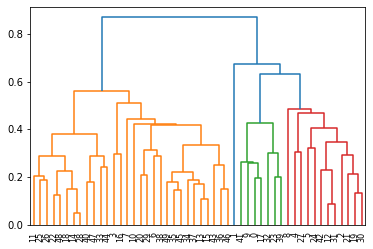

In [9]:
dendograms=sch.dendrogram(sch.linkage(df_norm,'average'))

In [10]:
k=[2,3,4,5]

for n in k:
    a_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'average')
    y_hc_a = a_hc.fit_predict(df_norm)
    a_Clusters=pd.DataFrame(y_hc_a,columns=['a_Clusters'])
    print(f'For k = {n}','\n',a_Clusters['a_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, a_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 1    30
0    20
Name: a_Clusters, dtype: int64
For k silhouette score = 2 
 0.42364457559625074
For k = 3 
 1    30
0    19
2     1
Name: a_Clusters, dtype: int64
For k silhouette score = 3 
 0.35149572430421583
For k = 4 
 0    30
1    12
3     7
2     1
Name: a_Clusters, dtype: int64
For k silhouette score = 4 
 0.3699239114027717
For k = 5 
 0    18
1    12
4    12
3     7
2     1
Name: a_Clusters, dtype: int64
For k silhouette score = 5 
 0.32574781342555276


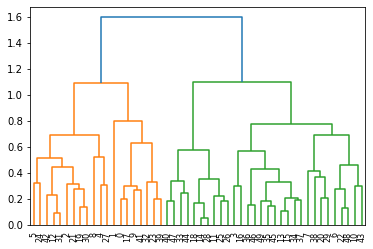

In [11]:
dendograms=sch.dendrogram(sch.linkage(df_norm,'complete'))

In [12]:
k=[2,3,4,5]

for n in k:
    cp_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'complete')
    y_hc_cp = cp_hc.fit_predict(df_norm)
    cp_Clusters=pd.DataFrame(y_hc_cp,columns=['cp_Clusters'])
    print(f'For k = {n}','\n',cp_Clusters['cp_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, cp_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    30
1    20
Name: cp_Clusters, dtype: int64
For k silhouette score = 2 
 0.42364457559625074
For k = 3 
 0    20
1    20
2    10
Name: cp_Clusters, dtype: int64
For k silhouette score = 3 
 0.30877213909512063
For k = 4 
 1    20
3    12
2    10
0     8
Name: cp_Clusters, dtype: int64
For k silhouette score = 4 
 0.30607294424263076
For k = 5 
 0    20
1    12
2    10
3     7
4     1
Name: cp_Clusters, dtype: int64
For k silhouette score = 5 
 0.3056360903608855


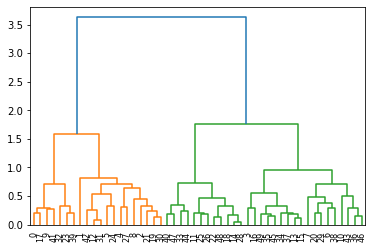

In [13]:
dendograms=sch.dendrogram(sch.linkage(df_norm,'ward'))

In [14]:
k=[2,3,4,5]

for n in k:
    w_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    y_hc_w = w_hc.fit_predict(df_norm)
    w_Clusters=pd.DataFrame(y_hc_w,columns=['w_Clusters'])
    print(f'For k = {n}','\n',w_Clusters['w_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, w_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    30
1    20
Name: w_Clusters, dtype: int64
For k silhouette score = 2 
 0.42364457559625074
For k = 3 
 0    20
1    18
2    12
Name: w_Clusters, dtype: int64
For k silhouette score = 3 
 0.3191691542812128
For k = 4 
 0    18
1    13
2    12
3     7
Name: w_Clusters, dtype: int64
For k silhouette score = 4 
 0.3298707379986785
For k = 5 
 0    13
2    12
4     9
1     9
3     7
Name: w_Clusters, dtype: int64
For k silhouette score = 5 
 0.2829012429325644


### By observing the dendeogram and silhouette score for all linkege,ward linkage give best value at k=2

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           30
1           20
dtype: int64

In [16]:
data1=data.copy()
data1['h_clusters']=Clusters
data1.sort_values('h_clusters')

,city,Murder,Assault,UrbanPop,Rape,h_clusters
49,Wyoming,6.8,161,60,15.6,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
28,New Hampshire,2.1,57,56,9.5,0
36,Oregon,4.9,159,67,29.3,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
37,Pennsylvania,6.3,106,72,14.9,0
22,Minnesota,2.7,72,66,14.9,0


In [17]:
data1.groupby('h_clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusters,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


### By observation of hierarchical clustring both cluster have aproximately same urbon population but crime rate of index 1 cluster is very heigh 

## K-MEANS Clustering

C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


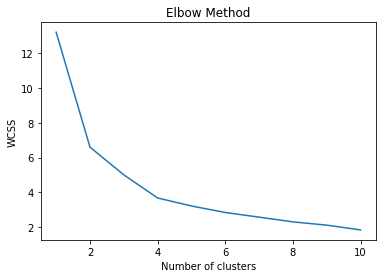

In [18]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Build Cluster algorithm
clusters_new = KMeans(2, random_state=0)
clusters_new.fit(df_norm)
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
#Assign clusters to the data set
data_k=data.copy()
data_k['clusterid_new'] = clusters_new.labels_
data_k.head()

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [21]:
data_k.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [22]:
#Build Cluster algorithm for k=3
clusters1 = KMeans(3, random_state=0)
clusters1.fit(df_norm)
clusters1.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [23]:
data_k1=data.copy()
data_k1['clusterid_new'] = clusters1.labels_
data_k1.head()

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [24]:
data_k1.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,12.331579,259.315789,68.315789,29.215789
1,3.600000,78.538462,52.076923,12.176923
2,6.016667,143.888889,72.333333,19.344444


In [25]:
#Build Cluster algorithm for k=4
clusters2 = KMeans(4, random_state=0)
clusters2.fit(df_norm)
clusters2.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [26]:
data_k2=data.copy()
data_k2['clusterid_new'] = clusters2.labels_
data_k2.head()

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [27]:
data_k2.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.852941,141.176471,73.647059,19.335294
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


### we performe k-mean clustering with different value of k and we obtained that when k =3, there is not much change in second cluster of k=2

## DBSCAN Clustering

In [30]:
# Normalizing Dataset

scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(data.iloc[:,1:])
scaler_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [31]:
EPS = [0.22,0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(scaler_df, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    32
 0    18
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.22 
 0.23530254327069516
For eps = 0.26 
  1    29
-1    17
 0     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.26 
 0.22475300564355863
For eps = 0.28 
  2    29
-1     8
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.28 
 0.2609122917630667
For eps = 0.3 
  1    37
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.3 
 0.2473858809927262


In [32]:
# By observing we get esp=0.28 and min_sample
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaler_df)
#Assign clusters to the data set
data_d=data.copy()
data_d['clusterid_new'] = dbscan.labels_
data_d.sort_values('clusterid_new')

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,-1
27,Nevada,12.2,252,81,46.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1
0,Alabama,13.2,236,58,21.2,0
23,Mississippi,16.1,259,44,17.1,0


In [34]:
data_d.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500
1,0,14.216667,258.000000,53.333333,21.000000
2,1,11.014286,262.571429,77.142857,28.800000
3,2,4.962069,114.724138,62.896552,16.224138


## Conclusion
### By performing Clustering Hierarchical gives k=2 ,k-mean gives k=2 while DBSCAN gives k=4 
### By observing DBSCAN we say that crime rate of index 2 is heigh but when we relate with urbon population then index 1 has high crime rate w.r.t. urbon population